In [1]:
import matplotlib.pyplot as plt
import cv2

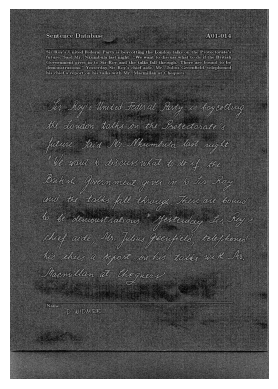

In [2]:
test_image = r"C:\Users\hp\Datasets\IAM\008\a01-014x.png"
image = cv2.imread(test_image)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Adaptive thresholding
t = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

plt.imshow(t, cmap='gray')
plt.axis('off')
plt.show()

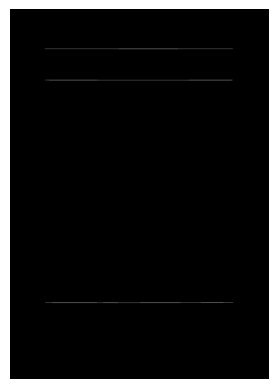

In [3]:
k = cv2.getStructuringElement(cv2.MORPH_RECT, (50, 1))

# Extract horizontal lines
lines = cv2.morphologyEx(t, cv2.MORPH_OPEN, k, iterations=2)

plt.imshow(lines, cmap='gray')
plt.axis('off')
plt.show()

( 333 , 380 )
( 334 , 679 )
( 337 , 2809 )


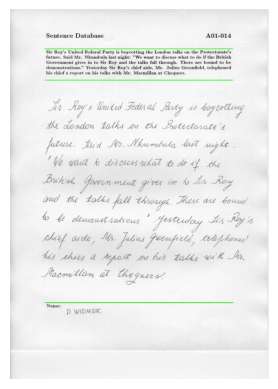

In [4]:
# Contours
c = image.copy()

contours, _ = cv2.findContours(lines, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Contours from top to bottom
contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[1])

for idx, ctr in enumerate(contours):
    x, y, w, h = cv2.boundingRect(ctr)
    cv2.rectangle(c, (x, y), (x + w, y + h), (0, 255, 0), 2)
    print("(",x, ",", y, ")")

plt.imshow(cv2.cvtColor(c, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

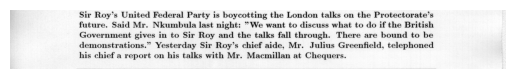

In [5]:
# Bounding box coordinates for the first and second black lines
x_first_line, y_first_line, width_first_line, height_first_line = cv2.boundingRect(contours[0])
x_second_line, y_second_line, width_second_line, height_second_line = cv2.boundingRect(contours[1])

# Vertical crop boundaries 
crop_start = y_first_line + height_first_line
crop_end = y_second_line

# Region between the two black lines
digital_text_region = gray[crop_start:crop_end, :]

plt.imshow(digital_text_region, cmap='gray')
plt.axis('off')
plt.show()

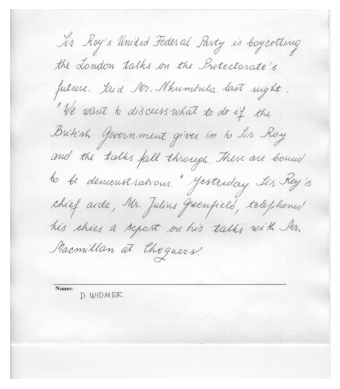

In [6]:
# Handwritten text region 
handwritten_text_region = gray[y_second_line + height_second_line :, :]

plt.imshow(handwritten_text_region, cmap='gray')
plt.axis('off')
plt.show()

In [8]:
cv2.imwrite(f"digital_text_sample.png", digital_text_region)
cv2.imwrite(f"handwritten_text_sample.png", handwritten_text_region)

True